# MIXUP DATA AUGMENTATION 
## -> Mixture of Inputs make Augmented Image
## -> Label is also Modified Accordingly

In [ ]:
# Import Depedencies
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import import_ipynb
import Utils

In [20]:
# Beta Distribution
def sampleBeta(alpha, beta, shape):
    x = tf.random.gamma(shape, alpha)
    y = tf.random.gamma(shape, beta)

    lamda = x/(x+y)

    return lamda

# Getting Lambda
lamda = sampleBeta(0.2, 0.2, [])
lamda

<tf.Tensor: shape=(), dtype=float32, numpy=0.29831108>

tf.Tensor(0.29831108, shape=(), dtype=float32)


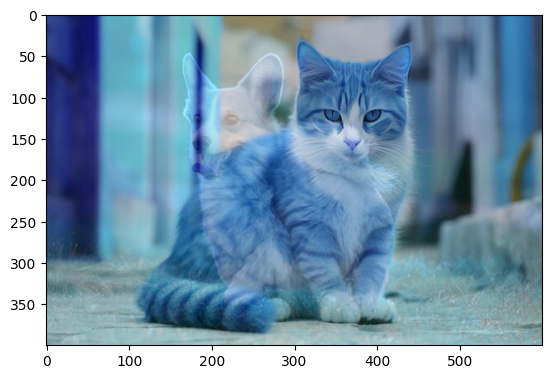

In [21]:
# Mixup Augmentation
dog = cv2.resize(cv2.imread("Images/dog.jpg"), (600, 400))
cat = cv2.resize(cv2.imread("Images/cat.jpg"), (600, 400))
dogLabel = 1
catLabel = 0
augmentedImage = lamda*dog + (1-lamda)*cat
augmentedLabel = lamda*dogLabel + (1-lamda)*catLabel
plt.imshow(augmentedImage/255.)
print(augmentedLabel)

In [24]:
# Adding Mixup Augnmentation To Our Model Pipeline
trainDataset1 = Utils.trainDataset.shuffle(buffer_size=8, reshuffle_each_iteration=True)
trainDataset2 = Utils.trainDataset.shuffle(buffer_size=8, reshuffle_each_iteration=True)

mixedDataset = tf.data.Dataset.zip((trainDataset1, trainDataset2))

def mixup(trainDataset1, trainDataset2):
    (image1, label1), (image2, label2) = trainDataset1, trainDataset2
    lamda = sampleBeta(0.2, 0.2, [])
    augmentedImage = lamda*image1 + (1-lamda)*image2
    augmentedLabel = lamda*tf.cast(label1, dtype=tf.float32) + (1-lamda)*tf.cast(label2, dtype=tf.float32)
    return augmentedImage, augmentedLabel

In [26]:
# Dataset Batching
BATCH_SIZE=32
BUFFER_SIZE = 8
trainDataset = mixedDataset.map(mixup).shuffle(buffer_size=BUFFER_SIZE, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
valDataset = Utils.valDataset.shuffle(buffer_size=BUFFER_SIZE, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
testDataset = Utils.testDataset.shuffle(buffer_size=BUFFER_SIZE, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [27]:
trainDataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [35]:
# Training
Utils.model.fit(trainDataset, validation_data=valDataset, epochs=3, verbose=1)

Epoch 1/3


2025-01-24 20:23:20.582064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


689/689 ━━━━━━━━━━━━━━━━━━━━ 44s 61ms/step - auc: 0.5833 - binary_accuracy: 0.3092 - false_negatives: 3747.6985 - false_positives: 1130.7102 - loss: 0.6875 - precision: 0.7902 - recall: 0.5390 - true_negatives: 1726.9232 - true_positives: 4450.6157 - val_auc: 0.7213 - val_binary_accuracy: 0.6065 - val_false_negatives: 900.0000 - val_false_positives: 184.0000 - val_loss: 0.6492 - val_precision: 0.7290 - val_recall: 0.3548 - val_true_negatives: 1176.0000 - val_true_positives: 495.0000
Epoch 2/3
689/689 ━━━━━━━━━━━━━━━━━━━━ 42s 61ms/step - auc: 0.6669 - binary_accuracy: 0.3562 - false_negatives: 3464.3494 - false_positives: 880.2812 - loss: 0.6185 - precision: 0.8422 - recall: 0.5782 - true_negatives: 1908.3608 - true_positives: 4802.9565 - val_auc: 0.9131 - val_binary_accuracy: 0.5579 - val_false_negatives: 1196.0000 - val_false_positives: 22.0000 - val_loss: 0.8606 - val_precision: 0.8977 - val_recall: 0.1389 - val_true_negatives: 1344.0000 - val_true_positives: 193.0000
Epoch 3/3
689/6